#### Import dictionaries

In [59]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DTR
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import re
import numpy as np
import math
import os
import json

# Cleaning

#### ReadCSV

In [6]:
df = pd.read_csv(r"NormalizedData.csv")
df = df[["BrandTypeCode", "Usage","Age","Price","ChassisStateCode","BodyStateCode","MotorStateCode"]]
df

,BrandTypeCode,Usage,Age,Price,ChassisStateCode,BodyStateCode,MotorStateCode
0,9,0.680000,0.800000,0.000000,1.0,0.9,1.0
1,9,0.424000,1.000000,0.000000,0.0,1.0,1.0
2,9,0.680000,0.800000,0.000000,1.0,0.9,1.0
3,9,0.680000,0.800000,0.000000,1.0,0.9,1.0
4,9,0.800000,1.000000,0.000000,0.0,0.9,1.0
...,...,...,...,...,...,...,...
242780,1408,0.635870,0.428571,0.903704,1.0,0.9,1.0
242781,1408,0.570652,0.142857,0.940741,1.0,1.0,1.0
242782,1408,0.605978,0.428571,0.940741,1.0,1.0,1.0
242783,1408,0.586957,0.142857,0.977778,1.0,0.8,1.0


#### 

c:\Users\saeed\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\saeed\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\saeed\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\saeed\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

KeyboardInterrupt: 

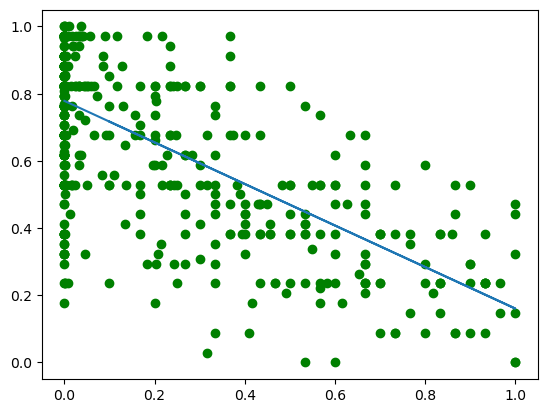

In [58]:
for i in (df["BrandTypeCode"].unique()):
    SpecType = df.loc[df["BrandTypeCode"] == i]
    # SpecType = SpecType.sort_values(by=["Usage"])


    X = SpecType[["Usage"]]
    Y = SpecType[["Price"]]
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3, shuffle = 0)

    regression = SVR(kernel = 'rbf')
    regression.fit(x_train, y_train)
    # print()

    pr = regression.predict(x_test)
    # plt.plot(x_test, )
    # plt.plot(x_test, regression.predict(x_test))
    regression = LinearRegression()
    regression.fit(x_test, pr)

    plt.plot(x_test, regression.predict(x_test))

    plt.scatter(x_train,y_train, color="green")
    # plt.show()
    name = SpecType["BrandTypeCode"].unique()
    plt.xlabel("Usage")
    plt.ylabel("Price")
    plt.savefig('./usageprice/{}.png'.format(name))
    
    plt.clf()

# sum(SpecType.Price) / len(SpecType.Price)

In [ ]:
for i in (df["BrandTypeCode"].unique()):
    SpecType = df.loc[df["BrandTypeCode"] == int(i)]
    if len(SpecType) >= 20:
        # SpecType = SpecType.sort_values(by=["Price"])
        # x1 = math.floor(((len(SpecType["Price"])) + 1) * 0.05)
        # q1 = SpecType.Price.iloc[x1]
        # x3 = math.floor(((len(SpecType["Price"])) + 1) * 0.95) - 1
        # q3 = SpecType.Price.iloc[x3]
        # SpecType = SpecType.loc[SpecType["Price"] >= q1]
        # SpecType = SpecType.loc[SpecType["Price"] <= q3]
        SpecType = SpecType.sort_values(by=["Age"])
        x = np.array((SpecType['Age']))
        # x = np.arange(len(SpecType['Price']))
        y = np.array(SpecType['Price'])
        plt.plot(x, y)
        name = str(SpecType.BrandTypeCode.unique())
        plt.xlabel(SpecType.BrandTypeCode.unique())
        plt.ylabel("Price")
        plt.savefig('./Age-Price/%s.png'%name)
        plt.clf()

#### jeddi

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts
df = pd.read_csv(r"FilteredData.csv")
df = df.loc[df["BrandTypeCode"] == 10]
print(df)
print(max(df['Price']))
print(min(df['Price']))
# plt.scatter(df['Price'],df['Price'])
df = df.drop(df[df['Price'] > 0.1].index, axis=0)
df = pd.DataFrame(df)
df = df.drop(df[df['Price'] < 0.003].index, axis=0)
df = df.sort_values(by=['Price'])
print(df)
x = np.arange(len(df['Price']))
plt.plot(x, df['Price'])
plt.show()
x = df.values


scalar = preprocessing.MinMaxScaler()
x_s = scalar.fit_transform(x)
df = pd.DataFrame(x_s)

y = np.array(df[3], dtype=float)[::]-.5
y_max = max(y)
print(y_max)
x = np.array(df[[1, 2, 4, 5, 6]])[::]-.5

X_train, X_test, y_train, y_test = tts(x, y, test_size=.10, random_state=452)
model = LinearRegression()
model.fit(X_train, y_train)
pr = model.predict(X_test)
print(mse(y_test, pr))


for i in range(len(pr)):
    print(y_test[i], pr[i])


In [ ]:
def PriceTrashClean(i):    
    if len(df["Price"][i]) >= 15:
        df["Price"][i] = 0
for j in df.index:
    PriceTrashClean(j)

#### Changing type of numerical fields

In [ ]:
df["Price"] = df["Price"].astype(float)
df["Usage"] = df["Usage"].astype(float)
df["Age"] = df["Age"].astype(float)

#### defining new column fir codes

In [ ]:
import json
with open('BrandTypeDic.json', encoding="utf-8-sig") as f:
    BrandTypeDic = f.read()
BrandTypeDic = json.loads(BrandTypeDic)

BrandTypeCode = []
ChassisStateCode = []
BodyStateCode = []
MotorStateCode = []

ChassisStateDic = {'فاقد وضعیت': '0',
                    'رنگ‌شده': '0.33',
                    'ضربه‌خورده': '0.67',
                    'سالم و پلمپ': '1.00'}

BodyStateDic = {
    'فاقد وضعیت': '0',
    'اوراقی': '0.10',
    'تصادفی': '0.20',
    'رنگ‌شدگی، در ۱ ناحیه‌': '0.30',
    '‌‌رنگ‌شدگی، در ۲ ناحیه‌‌': '0.40',
    'تمام‌رنگ': '0.50',
    'دوررنگ': '0.60',
    'رنگ‌شدگی': '0.70',
    'صافکاری بی‌رنگ': '0.80',
    'خط و خش جزیی': '0.90',
    'سالم و بی‌خط و خش': '1.00'}

MotorStateDic = {
    'فاقد وضعیت': '0',
    'نیاز به تعمیر': '0.33',
    'تعویض شده': '0.67',
    'سالم': '1.00'}


def ReplaceChassisStateCode(i):
    for k, v in ChassisStateDic.items():
        if i == k:
            return i.replace(k, v)
            # print(i)

def ReplaceBodyStateCode(i):
    for k, v in BodyStateDic.items():
        if i == k:
            return i.replace(k, v)
            # print(i)

def ReplaceMotorStateCode(i):
    for k, v in MotorStateDic.items():
        if i == k:
            return i.replace(k, v)
            # print(i)


for x in df["ChassisState"]:
    ChassisStateCode.append(ReplaceChassisStateCode(x))

for x in df["BodyState"]:
    BodyStateCode.append(ReplaceBodyStateCode(x))

for x in df["MotorState"]:
    MotorStateCode.append(ReplaceMotorStateCode(x))

df["BrandTypeCode"] = BrandTypeCode
df["ChassisStateCode"] = ChassisStateCode
df["BodyStateCode"] = BodyStateCode
df["MotorStateCode"] = MotorStateCode
print(df)

In [ ]:
df.to_csv("FilteredData.csv", encoding="utf-8-sig", header=True)

#### normalize and standardize data

In [56]:
# def normalization()
NormalizedData = pd.DataFrame(columns=[["Usage","Age","Price","ChassisStateCode","BodyStateCode","MotorStateCode"]])
print(NormalizedData)
df = pd.read_csv(r"FilteredData.csv", encoding="utf-8-sig")

Empty DataFrame
Columns: [(Usage,), (Age,), (Price,), (ChassisStateCode,), (BodyStateCode,), (MotorStateCode,)]
Index: []


In [58]:
for p in (df["BrandTypeCode"].unique()):
    SpecType = df.loc[df["BrandTypeCode"] == int(p)]
    SpecType = SpecType.sort_values(by=["Price"])
    x1 = math.floor(((len(SpecType["Price"])) + 1) * 0.10)
    q1 = SpecType.Price.iloc[x1]
    x3 = math.floor(((len(SpecType["Price"])) + 1) * 0.90) - 1
    q3 = SpecType.Price.iloc[x3]
    
    SpecType = SpecType.loc[SpecType["Price"] >= q1]
    SpecType = SpecType.loc[SpecType["Price"] <= q3]
    

    SpecType = SpecType.sort_values(by=["Usage"])
    x4 = math.floor(((len(SpecType["Usage"])) + 1) * 0.95) - 1
    q4 = SpecType.Usage.iloc[x4]
    SpecType = SpecType.loc[SpecType["Usage"] <= q4]
    
    SpecType = SpecType.sort_values(by=["Price"])
    # print(SpecType.values)
    if len(SpecType) >= 20:

        PriceMax = []
        PriceMin = []
        btc = []  # BrandTypeCode
        for k in SpecType["Price"].index:
            PriceMax.append(int(SpecType["Price"].max()))
        for k in SpecType["Price"].index:
            PriceMin.append(int(SpecType["Price"].min()))
        for k in SpecType["Price"].index:
            btc.append(int(p))

        scaler = preprocessing.MinMaxScaler()
        fitTransform = scaler.fit_transform(SpecType[["Usage", "Age", "Price", "ChassisStateCode", "BodyStateCode", "MotorStateCode"]])
        scaled_df = pd.DataFrame(fitTransform, columns=[["Usage", "Age", "Price", "ChassisStateCode", "BodyStateCode", "MotorStateCode"]])
        
        # Defining new columns for max price, min price and BrandTypeCode
        scaled_df["BrandTypeCode"] = btc
        scaled_df["MaxPrice"] = PriceMax
        scaled_df["MinPrice"] = PriceMin
        NormalizedData = pd.concat([NormalizedData, scaled_df])


In [59]:
NormalizedData.to_csv("NormalizedData.csv")

In [66]:
# plt.ion()
df = pd.read_csv(r"NormalizedData.csv")
for i in df["BrandTypeCode"].unique():
    SpecType = df.loc[df["BrandTypeCode"] == int(i)]
    SpecType = SpecType.sort_values(by=["Age"])
    
    # x = np.arange(len(SpecType['Price']))
    x = np.arange(len(SpecType['Price']))
    plt.plot(x, SpecType['Price'])
    
    name = str(SpecType.BrandTypeCode.unique())
    plt.xlabel("Age")
    plt.ylabel("Price")
    plt.savefig('./pngfolder6/%s.png'%name)
    # plt.show()
    plt.clf()


<Figure size 640x480 with 0 Axes>

#### Defining ChassisState BodyState MotorState

In [ ]:
ChassisState = {}
j = 0
for i in df.ChassisState.unique():
    k = float(j/(df.ChassisState.nunique() - 1))
    ChassisState.update({i: "%.2f"%k})
    j+=1
print(ChassisState)

BodyState = {}
j = 0
for i in df.BodyState.unique():
    k = float(j/(df.BodyState.nunique() - 1))
    BodyState.update({i: "%.2f"%k})
    j+=1
print(BodyState)

MotorState = {}
j = 0
for i in df.MotorState.unique():
    k = float(j/(df.MotorState.nunique() - 1))
    MotorState.update({i: "%.2f"%k})
    j+=1
print(MotorState)



#### Define year exchange function

In [ ]:
age = []
def age(year):

    if year > 1600:
        age = 2022 - year
    elif year < 1600:
        age = 1401 - year
    age.append(age)
df["Age"] = age

#### Brand and type dictionary

In [ ]:
# brandDic = {}
# brandDic ['آئودی'] = []
# brandDic ['آریا'] = []
# brandDic ['آریسان'] = []
# brandDic ['آلفارومئو'] = []
# brandDic ['آمیکو'] = []
# brandDic ['اپل'] = []
# brandDic ['اس دبلیو ام'] = []
# brandDic ['اسمارت'] = []
# brandDic ['الدزمبیل'] = []
# brandDic ['ام جی'] = []
# brandDic ['ام وی ام'] = []
# brandDic ['ایسوزو'] = []
# brandDic ['اینرودز'] = []
# brandDic ['اینفینیتی'] = []
# brandDic ['ب ام و'] = []
# brandDic ['بایک'] = []
# brandDic ['برلیانس'] = []
# brandDic ['بسترن'] = []
# brandDic ['بنز'] = []
# brandDic ['بورگوارد'] = []
# brandDic ['بی وای دی'] = []
# brandDic ['بیسو'] = []
# brandDic ['بیوک'] = []
# brandDic ['پاژن'] = []
# brandDic ['پراید'] = []
# brandDic ['پروتون'] = []
# brandDic ['پژو'] = []
# brandDic ['پورشه'] = []
# brandDic ['پونتیاک'] = []
# brandDic ['پیکان'] = []
# brandDic ['تارا'] = []
# brandDic ['تویوتا'] = []
# brandDic ['تیبا'] = []
# brandDic ['جک'] = []
# brandDic ['جی ام سی GMC'] = []
# brandDic ['جِی ام سی JMC'] = []
# brandDic ['جیپ'] = []
# brandDic ['جیلی'] = []
# brandDic ['چانگان'] = []
# brandDic ['چری'] = []
# brandDic ['داتسون'] = []
# brandDic ['دامای'] = []
# brandDic ['دانگ فنگ'] = []
# brandDic ['دایون'] = []
# brandDic ['دنا'] = []
# brandDic ['دوج'] = []
# brandDic ['دوو'] = []
# brandDic ['دی اس'] = []
# brandDic ['دیگنیتی'] = []
# brandDic ['رانا'] = []
# brandDic ['راین'] = []
# brandDic ['رنو'] = []
# brandDic ['ریگان'] = []
# brandDic ['زامیاد'] = []
# brandDic ['زوتی'] = []
# brandDic ['سانگ یانگ'] = []
# brandDic ['ساینا'] = []
# brandDic ['سئات'] = []
# brandDic ['سمند'] = []
# brandDic ['سوئیست'] = []
# brandDic ['سوبارو'] = []
# brandDic ['سوزوکی'] = []
# brandDic ['سیتروئن'] = []
# brandDic ['سیناد'] = []
# brandDic ['شاهین'] = []
# brandDic ['شورولت'] = []
# brandDic ['فردا'] = []
# brandDic ['فوتون'] = []
# brandDic ['فورد'] = []
# brandDic ['فولکس'] = []
# brandDic ['فونیکس'] = []
# brandDic ['فیات'] = []
# brandDic ['فیدلیتی'] = []
# brandDic ['کاپرا'] = []
# brandDic ['کادیلاک'] = []
# brandDic ['کارا'] = []
# brandDic ['کوییک'] = []
# brandDic ['کی ام سی'] = []
# brandDic ['کیا'] = []
# brandDic ['گریت وال'] = []
# brandDic ['گک'] = []
# brandDic ['لاماری'] = []
# brandDic ['لکسوس'] = []
# brandDic ['لندرور'] = []
# brandDic ['لندمارک'] = []
# brandDic ['لوتوس'] = []
# brandDic ['لیفان'] = []
# brandDic ['لینکلن'] = []
# brandDic ['مازراتی'] = []
# brandDic ['مزدا'] = []
# brandDic ['مکث موتور'] = []
# brandDic ['میتسوبیشی'] = []
# brandDic ['مینی'] = []
# brandDic ['نیسان'] = []
# brandDic ['ولوو'] = []
# brandDic ['ون'] = []
# brandDic ['هامر'] = []
# brandDic ['هاوال'] = []
# brandDic ['هایما'] = []
# brandDic ['هن تنگ'] = []
# brandDic ['هوندا'] = []
# brandDic ['هیلمن'] = []
# brandDic ['هیوسو'] = []
# brandDic ['هیوندای'] = []
# brandDic ['یوآز'] = []

#### Locate

In [ ]:
def locate(i):
    return df[i:(i+1)]

# # df[2:3]
# locate(0)

In [ ]:
# for i in range(len(df.index)):
#     # print(type(df['Price'][i]))
#         # print(df.loc[[79]])
#         # df.drop(index=[i], axis=0, inplace=True)
#         # print("diiiiiiiiiiiizzzzzzz")
        
#         # df.drop([i])
#         # df[i]
#         # df.loc[:,i]
    
#     # # print(type(i))
#     if type(df['Usage'][i]) ==  str:
#         df['Usage'][i] = int((df['Usage'][i]).replace('٬', '').replace('\u200c', ''))
        
#     if type(df['Price'][i]) ==  str:
#         df['Price'][i] = float((df['Price'][i]).replace('٬', '').replace('\u200c', ''))
    
#     if type(df['Year'][i]) ==  str:
#         df['Year'][i] = int((df['Year'][i]).replace('٬', '').replace('\u200c', ''))
#         # (df['Price'][i]).replace(",","")
#         # print(df['Price'][i])
#         # print(i)

In [ ]:
df

In [ ]:
# # for (k, v) in map:
# #     for c in v:
# #         text = text.replace(c, k)

# # def processString3(txt):
# #   txt = txt.replace('\u200c', '')

# # for i in df["Infos"]:
# #   processString3(i)
# # processString3(mimi)
# # processString3(txt)
# print(df.Infos.nunique())
# print(df.Infos.unique())

#### Renaming the column names

In [ ]:
# df = df.rename({'Year': 'Age'}, axis=1)  # new method

#### a code for normalizing the strings

In [ ]:
map = {
    ' ': ['‌'],
    'آ': [],
    'ب': [],
    'پ': [],
    'ت': ['ٿ', 'ټ', 'ٺ', 'ت', 'ٹ'],
    'ث': ['ٽ', 'ث'],
    'ج': [],
    'چ': ['ڇ', 'چ', 'ڄ', 'ڃ'],
    'ح': ['ځ', 'ح'],
    'خ': ['ڿ', 'خ', 'څ', 'ڂ', 'خ'],
    'د': ['ډ', 'ڈ', 'ۮ', 'د'],
    'ذ': ['ڐ', 'ڏ', 'ڎ', 'ڍ', 'ڌ', 'ڊ', 'ڋ', 'ذ'],
    'ر': ['ږ', 'ڕ', 'ڔ', 'ړ', 'ڒ', 'ر'],
    'ز': [],
    'ژ': ['ۯ', 'ڙ', 'ژ', 'ڗ'],
    'س': ['ښ', 'س'],
    'ش': ['ۺ', 'ڜ', 'ڛ', 'ش'],
    'ص': ['ص', 'ڝ'],
    'ض': ['ۻ', 'ض', 'ڞ'],
    'ط': [],
    'ظ': ['ڟ', 'ظ'],
    'ع': [],
    'غ': ['ۼ', 'غ', 'ڠ'],
    'ف': ['ڦ', 'ڥ', 'ڤ', 'ڣ', 'ڢ', 'ڡ', 'ف'],
    'ق': ['ڨ', 'ڧ', 'ٯ', 'ق'],
    'ک': ['ؼ', 'ػ', 'ڪ', 'ک', 'ګ', 'ڬ', 'ڭ', 'ك', 'ڮ'],
    'گ': ['گ', 'ڰ', 'ڱ', 'ڲ', 'ڳ', 'ڴ'],
    'ل': ['ڵ', 'ڶ', 'ڷ', 'ڸ', 'ل'],
    'م': ['۾', 'م'],
    'ن': ['ن', 'ڽ', 'ڼ', 'ڻ', 'ں', 'ڹ'],
    'و': ['ؤ', 'و', 'ٷ', 'ٶ', 'ۏ', 'ۋ', 'ۊ', 'ۉ', 'ۈ', 'ۇ', 'ۆ', 'ۅ', 'ۄ'],
    'ھ': ['ۿ', 'ھ'],
    'ه': ['ە', 'ۂ', 'ہ', 'ۀ', 'ه'],
    'ة': ['ة', 'ۃ'],
    'ی': ['ئ', 'ؠ', 'ؿ', 'ؾ', 'ؽ', 'ي', 'ى', 'ٸ', 'ی', 'ۍ', 'ێ', 'ۑ', 'ې', 'ۓ', 'ے'],
}
text = "unnormal tex"
for (k, v) in map:
    for c in v:
        text = text.replace(c, k)


# Estimation

In [ ]:
import pathlib
dir_path = pathlib.Path().parent.resolve()

# # Reading the csv file
# df = pd.read_csv("%s\\FilteredData.csv" % dir_path)

# Reading the json file
with open('%s/response.json' % dir_path, mode='r', encoding='utf-8') as o:
    wjdata = json.load(o)


def brand(x):
    brand = (wjdata['result']['data'][(x-1)]['title'])
    return(brand)


ModeleNum = 1371
ModeleUsage = 40000
ModeleAge = 0

specVal = df.loc[df["Infos"] == brand(ModeleNum)]
# average = (specVal["Price"].mean())
# specVal = specVal.loc[specVal["Price"] < 1.4 * average]
# specVal = specVal.loc[specVal["Price"] > 0.6 * average]

average = (specVal["Price"].mean())
specVal2 = specVal.loc[specVal["Price"] < (1.15 * average)]
specVal2 = specVal2.loc[specVal2["Price"] > (0.85 * average)]
average = (specVal2["Price"].mean())
specVal2.sort_values(by=["Price"])
maxPrice = (specVal2.Price.max())
minPrice = (specVal2.Price.min())
if specVal2.Price.nunique() < 4 and specVal2.Price.nunique() > 1:
    
    x =  {"title": str(specVal2.Infos.unique()),
            "Min": math.ceil(minPrice),
            "Average": math.ceil(average),
            "Max": math.ceil(maxPrice)
            }
    print(x)
elif specVal2.Price.nunique() >= 4:
    q1 = specVal2.Price.iloc[math.floor(
        ((len(specVal2["Price"])) + 1) * 0.25)]
    q3 = specVal2.Price.iloc[math.floor(
        ((len(specVal2["Price"])) + 1) * 0.75)]

    q1 = math.ceil(q1)
    q3 = math.ceil(q3)

    # print(average ,minPrice, maxPrice)

    X = specVal2[["Age", "Usage"]]
    Y = specVal2["Price"]
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3)

    regression = linear_model.LinearRegression()
    regression.fit(x_train, y_train)
    print(regression.predict(x_test))

    # عرض از مبدا و ضرایب   # intercept & coefficients
    Intercept = regression.intercept_
    Coef = regression.coef_


    guessPrice = float(Intercept) + (Coef[0] * float(ModeleAge)) + (Coef[1] * float(ModeleUsage))


    print(regression.score(x_train,y_train))

In [ ]:
df = pd.read_csv(r"FilteredData.csv")
df = df[["Infos" , "Usage" , "Age" , "Price"]]
df

def brand(x):
    brand = (wjdata['result']['data'][(x-1)]['title'])
    return(brand)


ModeleNum = 371
# ModeleUsage = 40000
# ModeleAge = 0

df = df.loc[df["Infos"] == brand(ModeleNum)]
X = df[["Age", "Usage"]]
Y = df["Price"]
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3)

regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
print(regression.predict(x_test))

# عرض از مبدا و ضرایب   # intercept & coefficients
Intercept = regression.intercept_
Coef = regression.coef_
plt.scatter(df['Age'], df["Price"], color='red')
plt.scatter(df['Usage'], df["Price"], color='green')
plt.title('Pricetable')
plt.xlabel('Independents')
plt.ylabel('Dependents')
plt.show


In [ ]:
print("INTERCEPT:\n", regression.intercept_)

In [ ]:
print("Coefficient:\n" , regression.coef_)

In [ ]:
print(df.Infos.nunique())
print(df.Infos.unique())

# Get output

In [ ]:
x = pd.read_csv(r"CompleteData.csv", encoding = "utf-8-sig")
x.to_csv(r"CompleteDatas.csv", encoding = "utf-8-sig")